In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadfile(fn):
    """Load plasma torch spectrum from file
    
    Returns pandas dataframe with two columns. When loading, it
    checks to validate that average counts ("Intensity") is above 100.
    It also checks that all channels above 1000nm are less than 100.
    If either of these checks fails, it raises an error instead of
    loading the data. It also sets all channels with negative counts
    to zero.
    """
    d = pd.read_table(
        fn,
        sep='\s+',
        skiprows=15,
        skipfooter=240,
        engine='python',
        header=None,
        names=['Wavelength', 'Intensity']
    )
    d[d<0] = 0
    
    # Verify the mean is above 100
    mn = np.mean(d['Intensity'])
    if mn < 100:
        raise Exception('Average intensity is too low ({} < 100)'.format(np.mean(d['Intensity'])))
    
    # Verify that channels above 1000nm are < 100
    high_wavelength_values = d[d['Wavelength'] > 1000]
    mx = np.max(high_wavelength_values['Intensity'])
    if mx > 100:
        raise Exception('High-wavelength intensity too high ({} > 100)'.format(mx))
    
    # Normalize the intensity
    d['Intensity'] = d['Intensity'] / sum(d['Intensity'])
    
    return d

In [3]:
d = loadfile('Data/20170721-Ar-H-Torch.txt')

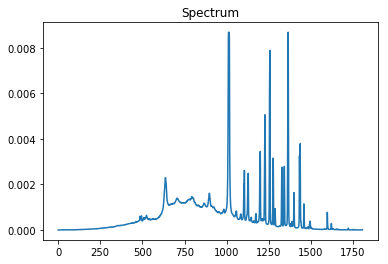

In [4]:
f = plt.figure(1)
p = plt.subplot(111)
p.plot(d['Intensity'])
fig_size = [0, 0]
fig_size[0] = 12
fig_size[1] = 9
plt.title("Spectrum")
plt.show()

In [5]:
bd1 = loadfile("Data/Bad/20170906_ORNL-Torch-Sil_Subt14_14-31-55-813.txt")

Exception: High-wavelength intensity too high (766.31 > 100)

In [6]:
bd2 = loadfile('Data/Bad/20170906_ORNL-Torch-Sil_Subt14_14-33-16-145.txt')

Exception: Average intensity is too low (6.387202906071586 < 100)